# Imports

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from percolation import read_percolation_data
from sklearn.model_selection import train_test_split

# Loading Data

In [29]:
L = 32
pc = 0.59274
#p_arr = np.round(np.arange(0, 1.0, 0.01), 4)
#p_arr = np.round(np.array([0.57, 0.58, 0.61, 0.62]), 4)
p_arr = np.round(np.array([0.2 , 0.9]), 4)
p_arr = np.append(p_arr, pc)

In [30]:
X, y = read_percolation_data(L, p_arr, pc, max_configs_per_p=1000)

In [31]:
print(X.shape, y.shape)

(3000, 32, 32, 1) (3000,)


In [32]:
N = X.shape[0]
L = X.shape[1] 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [34]:
print('X.shape:', X.shape, ', y.shape:', y.shape)
print('X_train.shape:', X_train.shape, ', y_train.shape:', y_train.shape)
print('X_test.shape:', X_test.shape, ', y_test.shape:', y_test.shape)

X.shape: (3000, 32, 32, 1) , y.shape: (3000,)
X_train.shape: (2400, 32, 32, 1) , y_train.shape: (2400,)
X_test.shape: (600, 32, 32, 1) , y_test.shape: (600,)


In [35]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 2


# Defining and training the AutoEncoder

In [36]:
latent_space_dimension = 2

In [37]:
X_train_data = X_train.reshape((-1, 32*32))

In [38]:
X_train_data.shape

(2400, 1024)

In [39]:
from sklearn.manifold import Isomap
model = Isomap(n_components=latent_space_dimension)
X_train2d = model.fit_transform(X_train_data)

In [40]:
X_train2d.shape

(2400, 2)

In [41]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None, thumb_frac=0.05, cmap='gray'):
  ax = ax or plt.gca()
  
  proj = model.fit_transform(data)
  ax.plot(proj[:, 0], proj[:, 1], '.k')
  
  if images is not None:
    min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
    shown_images = np.array([2 * proj.max(0)])
    for i in range(data.shape[0]):
      dist = np.sum((proj[i] - shown_images) ** 2, 1)
      if np.min(dist) < min_dist_2:
        continue
      shown_images = np.vstack([shown_images, proj[i]])
      imagebox = offsetbox.AnnotationBbox(
        offsetbox.OffsetImage(images[i],  cmap=cmap), proj[i])
      ax.add_artist(imagebox)

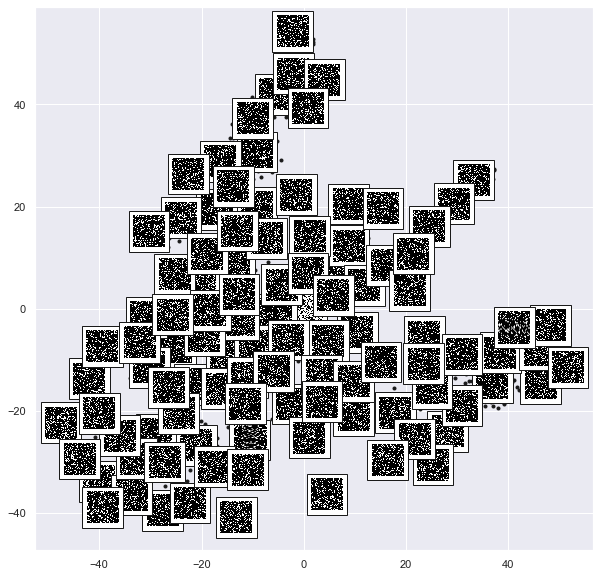

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(X_train_data, model=Isomap(n_components=2), images=X_train.reshape((-1,32,32)))